#### Import Modules

In [4]:
# datetime
from datetime import datetime

# Analysis
import numpy as np
import pandas as pd

# Plot Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

#### Read the Data

In [5]:
adf = pd.read_csv("Data/dft-road-casualty-statistics-collision-2022.csv", dtype={"accident_index": str, "accident_reference": str})
adf = adf.astype(str)
adf.replace('-1', pd.NA, inplace=True)
adf.describe().T

,count,unique,top,freq
accident_index,106004,106004,2022010352073,1
accident_year,106004,1,2022,106004
accident_reference,106004,106004,010352073,1
location_easting_osgr,106004,85481,nan,22
location_northing_osgr,106004,85711,nan,22
longitude,106004,103897,nan,22
latitude,106004,102680,nan,22
police_force,106004,44,1,23327
accident_severity,106004,3,3,81069
number_of_vehicles,106004,14,2,65507


#### Accidents over Months in One Year (2022)

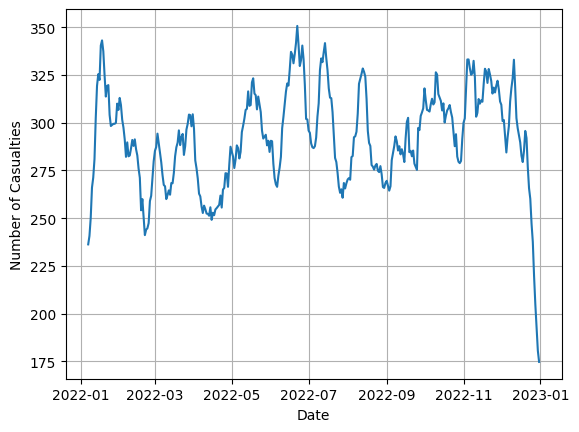

In [14]:
adf2 = adf.copy()

variable = 'date'

statistics = adf2[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda date: datetime.strptime(date, '%d/%m/%Y'))
statistics = statistics.sort_values(by=variable)

statistics['count'] = statistics['count'].rolling(window=7).mean()

fig, ax = plt.subplots()
plt.plot(statistics[variable], statistics['count'])
plt.grid()
plt.xlabel("Date")
plt.ylabel("Number of Casualties")
plt.show()

In [15]:
# save the plot
fig.savefig('Plots/month_of_year.jpg', bbox_inches='tight')

#### Accident Over Days of Week on Average in One Year (2022)

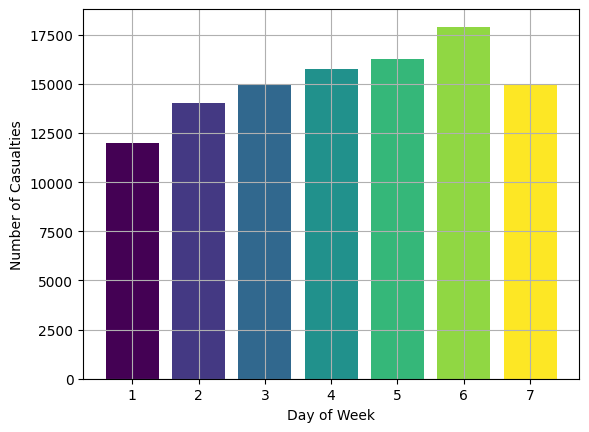

In [16]:
adf2 = adf.copy()

variable = 'day_of_week'
variable2 = 'sex'

statistics = adf2[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics = statistics.sort_values(by=variable)

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(statistics)))
ax.bar(statistics[variable], statistics['count'], color=colors)
plt.grid()
plt.xlabel("Day of Week")
plt.ylabel("Number of Casualties")
plt.show()

In [17]:
# save the plot
fig.savefig('Plots/day_of_week.jpg', bbox_inches='tight')

#### Accident Over Hours of Day on Average in One Year (2022)

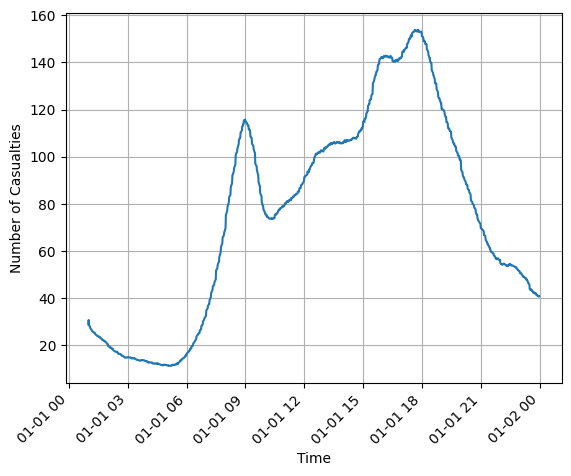

In [18]:
adf2 = adf.copy()

variable = 'time'

statistics = adf2[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda date: datetime.strptime(date, '%H:%M'))
statistics = statistics.sort_values(by=variable)

statistics['count'] = statistics['count'].rolling(window=60).mean()

fig, ax = plt.subplots()
plt.plot(statistics[variable], statistics['count'])
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Number of Casualties")
plt.show()

In [19]:
# save the plot
fig.savefig('Plots/hours_of_day.jpg', bbox_inches='tight')